<a href="https://colab.research.google.com/github/simran-sai/Healthcare-Proffesional-Classifier/blob/main/Final_HCP__classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [363]:
import pandas as pd

In [364]:
df=pd.read_csv('Doceree-HCP_Train.csv',encoding='iso-8859-1')
df.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0.0
2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1.0
4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,NaN,0.0


In [365]:
!pip install klib

In [366]:
df.shape


(113937, 14)

  This shows number of unique values present in each column

GridSpec(6, 10)

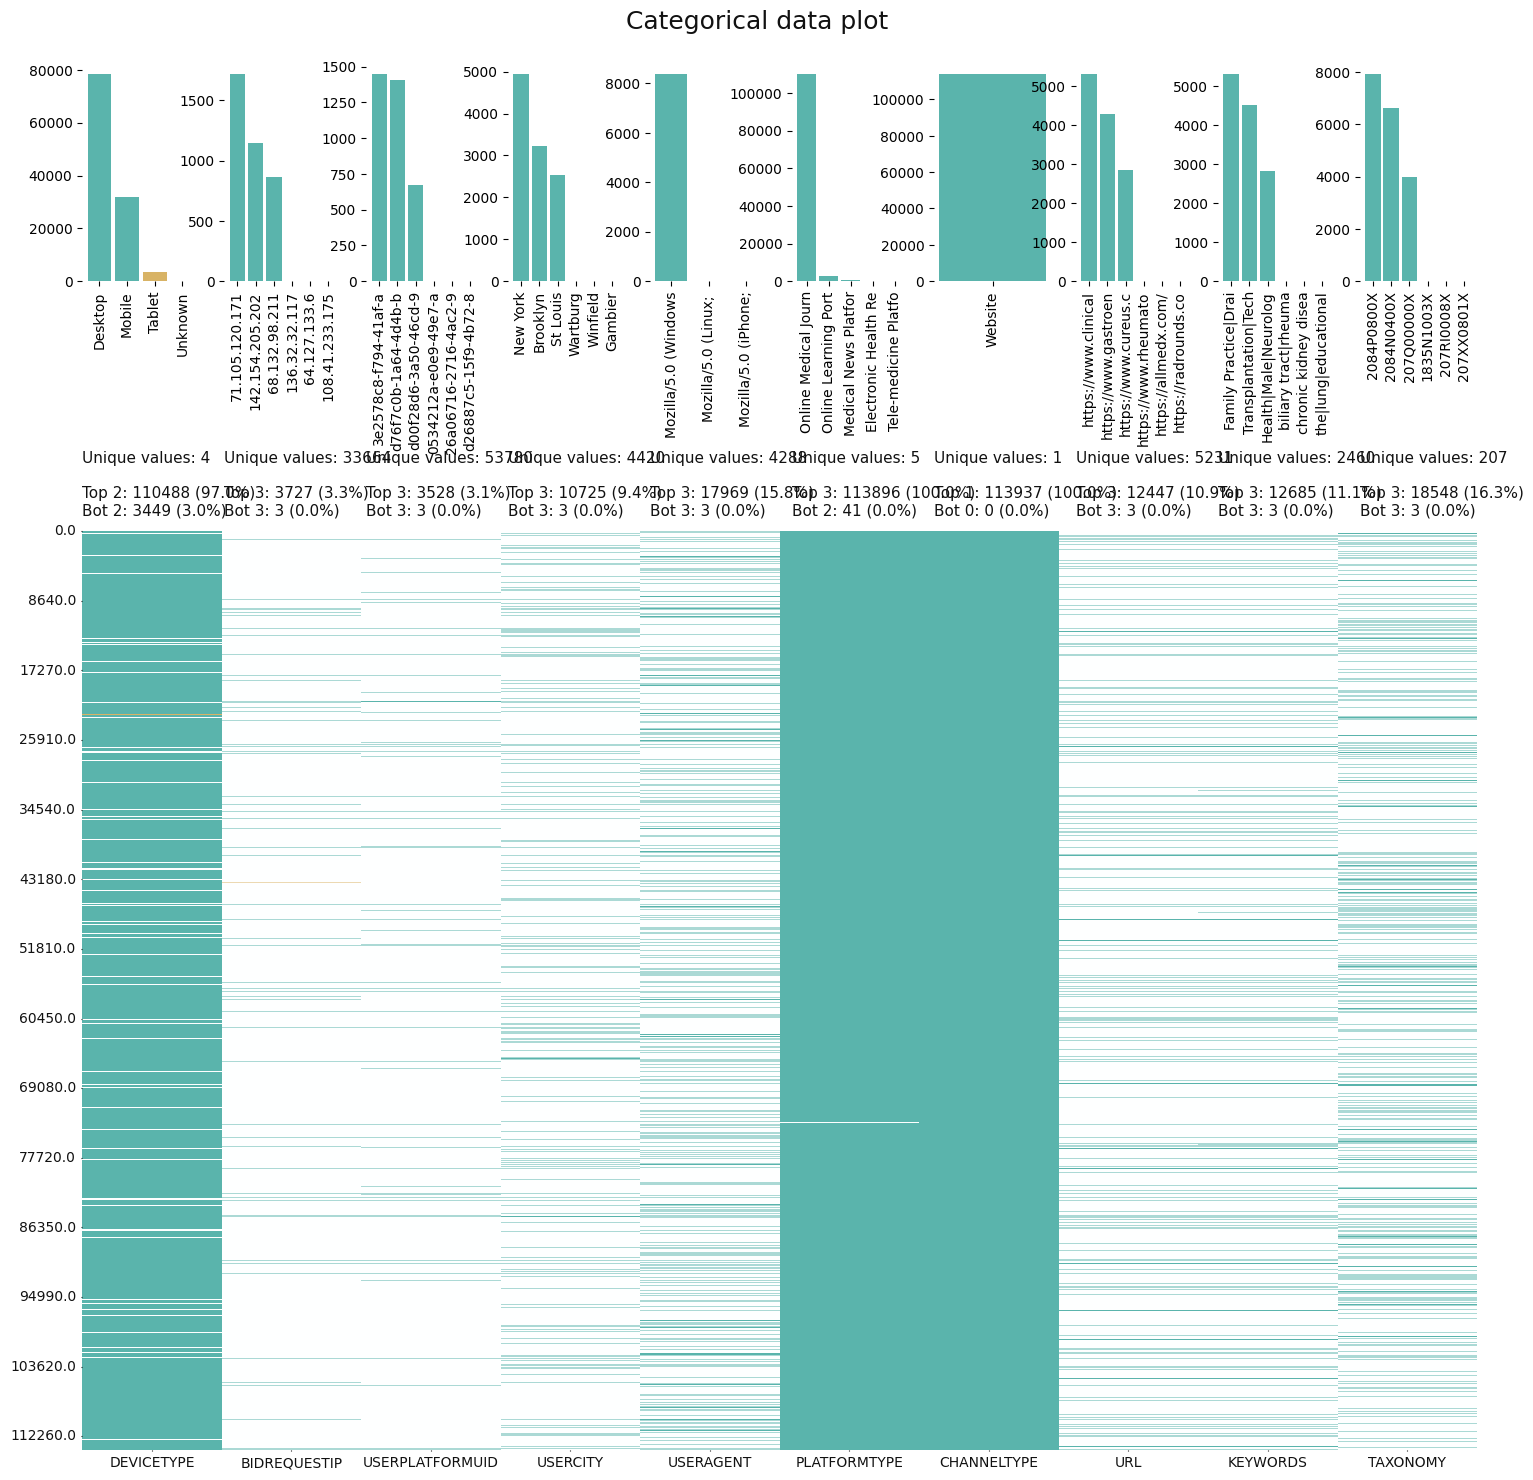

In [367]:
import klib
klib.cat_plot(df)

In [368]:
df = klib.data_cleaning(df)

Shape of cleaned data: (113937, 13) - Remaining NAs: 92582


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 1
     of which 1 single valued.     Columns: ['channeltype']
Dropped missing values: 0
Reduced memory by at least: 5.23 MB (-42.97%)



In [369]:
df=klib.clean.convert_datatypes(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   id               113937 non-null  int32   
 1   devicetype       113937 non-null  category
 2   platform_id      113937 non-null  int8    
 3   bidrequestip     113937 non-null  string  
 4   userplatformuid  113933 non-null  string  
 5   usercity         107578 non-null  string  
 6   userzipcode      109345 non-null  float64 
 7   useragent        113935 non-null  string  
 8   platformtype     113937 non-null  category
 9   url              113937 non-null  string  
 10  keywords         113937 non-null  category
 11  taxonomy         32313 non-null   category
 12  is_hcp           113936 non-null  float32 
dtypes: category(4), float32(1), float64(1), int32(1), int8(1), string(5)
memory usage: 6.9 MB


In [370]:
df.isnull().mean()*100

id                  0.000000
devicetype          0.000000
platform_id         0.000000
bidrequestip        0.000000
userplatformuid     0.003511
usercity            5.581154
userzipcode         4.030297
useragent           0.001755
platformtype        0.000000
url                 0.000000
keywords            0.000000
taxonomy           71.639590
is_hcp              0.000878
dtype: float64

Handling the missing values
Since the missing values of usercity and userzipcode is around 5% we randomly fill the missing values with existing non missing values

In [371]:

df.columns

Index(['id', 'devicetype', 'platform_id', 'bidrequestip', 'userplatformuid',
       'usercity', 'userzipcode', 'useragent', 'platformtype', 'url',
       'keywords', 'taxonomy', 'is_hcp'],
      dtype='object')

In [372]:
print(df)

            id devicetype  platform_id    bidrequestip  \
0         1001    Desktop            2    170.173.0.22   
1         1002    Desktop            2   65.216.253.25   
2         1003    Desktop            2    66.232.79.22   
3         1004    Desktop            3  137.54.125.246   
4         1005     Mobile            7  174.202.231.99   
...        ...        ...          ...             ...   
113932  114933    Desktop            2    68.82.97.126   
113933  114934    Desktop            2  104.172.11.109   
113934  114935    Desktop            7   174.21.94.113   
113935  114936     Mobile            2  69.253.129.131   
113936  114937     Mobile            2  108.41.233.175   

                             userplatformuid      usercity  userzipcode  \
0       6974dcaa-f932-480e-9fb5-c52e20e1393a      Portland      97206.0   
1       c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf     Arlington      22202.0   
2       a698de4b-e200-46dd-b5fb-40402175ae18   New Meadows      83654.0   
3  

In [373]:
import random

def fill_missing_with_random(df, column):
    existing_values = df[column].dropna().unique()
    missing_indices = df[df[column].isnull()].index

    df.loc[missing_indices, column] = random.choice(existing_values)

# Fill missing values in 'userzipcode' column
fill_missing_with_random(df, 'userzipcode')

# Fill missing values in 'usercity' column
fill_missing_with_random(df, 'usercity')


In [374]:
df.isnull().mean()*100

id                  0.000000
devicetype          0.000000
platform_id         0.000000
bidrequestip        0.000000
userplatformuid     0.003511
usercity            0.000000
userzipcode         0.000000
useragent           0.001755
platformtype        0.000000
url                 0.000000
keywords            0.000000
taxonomy           71.639590
is_hcp              0.000878
dtype: float64

In [375]:
df.head()

,id,devicetype,platform_id,bidrequestip,userplatformuid,usercity,userzipcode,useragent,platformtype,url,keywords,taxonomy,is_hcp
0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0.0
2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,Weems,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1.0
4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,NaN,0.0


To handle missing values of 'taxonomy' we create a new category for all misswing values

In [376]:


def fill_missing_with_category(df, column, category):
    # Convert the column to string type
    df[column] = df[column].astype(str)

    # Fill missing values with 'missing' category
    df[column].fillna(category, inplace=True)

    # Convert the column back to categorical type if desired
    #df[column] = df[column].astype('category')

# Fill missing values in 'taxonomy' column with 'missing' category
fill_missing_with_category(df, 'taxonomy', 'Missing')


In [377]:

df.drop([ 'url'], axis=1, inplace=True)


# Print the updated original DataFrame
print(df)


            id devicetype  platform_id    bidrequestip  \
0         1001    Desktop            2    170.173.0.22   
1         1002    Desktop            2   65.216.253.25   
2         1003    Desktop            2    66.232.79.22   
3         1004    Desktop            3  137.54.125.246   
4         1005     Mobile            7  174.202.231.99   
...        ...        ...          ...             ...   
113932  114933    Desktop            2    68.82.97.126   
113933  114934    Desktop            2  104.172.11.109   
113934  114935    Desktop            7   174.21.94.113   
113935  114936     Mobile            2  69.253.129.131   
113936  114937     Mobile            2  108.41.233.175   

                             userplatformuid      usercity  userzipcode  \
0       6974dcaa-f932-480e-9fb5-c52e20e1393a      Portland      97206.0   
1       c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf     Arlington      22202.0   
2       a698de4b-e200-46dd-b5fb-40402175ae18   New Meadows      83654.0   
3  

We perform label encoding to the all the categorical values present

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   id               113937 non-null  int32   
 1   devicetype       113937 non-null  category
 2   platform_id      113937 non-null  int8    
 3   bidrequestip     113937 non-null  string  
 4   userplatformuid  113933 non-null  string  
 5   usercity         113937 non-null  string  
 6   userzipcode      113937 non-null  float64 
 7   useragent        113935 non-null  string  
 8   platformtype     113937 non-null  category
 9   keywords         113937 non-null  category
 10  taxonomy         113937 non-null  object  
 11  is_hcp           113936 non-null  float32 
dtypes: category(3), float32(1), float64(1), int32(1), int8(1), object(1), string(4)
memory usage: 6.7+ MB


In [379]:

df = df.dropna(subset=['useragent', 'userplatformuid', 'is_hcp'])


In [380]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame named 'df' containing your dataset

# Get the categorical column names
categorical_columns = df.select_dtypes(include=['category','object']).columns.tolist()

# Perform label encoding on categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Print the updated DataFrame with label encoded categorical columns
df.head()


<ipython-input-380-9c33b43cee45>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
<ipython-input-380-9c33b43cee45>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
<ipython-input-380-9c33b43cee45>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

,id,devicetype,platform_id,bidrequestip,userplatformuid,usercity,userzipcode,useragent,platformtype,keywords,taxonomy,is_hcp
0,1001,0,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,3,458,207,0.0
1,1002,0,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,3,108,207,0.0
2,1003,0,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,3,458,207,0.0
3,1004,0,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,Weems,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,3,273,149,1.0
4,1005,1,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,3,257,207,0.0


In [381]:
string_columns = df.select_dtypes(include=['string']).columns.tolist()

# Drop rows with missing values in the string columns
df = df.dropna(subset=string_columns)


In [382]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame named 'df' containing your dataset

# Get the categorical column names
categorical_columns = df.select_dtypes(include=['string']).columns.tolist()

# Perform label encoding on categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Print the updated DataFrame with label encoded categorical columns
df.head()


,id,devicetype,platform_id,bidrequestip,userplatformuid,usercity,userzipcode,useragent,platformtype,keywords,taxonomy,is_hcp
0,1001,0,2,6579,22183,3177,97206.0,2857,3,458,207,0.0
1,1002,0,2,19250,40575,130,22202.0,2672,3,108,207,0.0
2,1003,0,2,19701,34968,2701,83654.0,2672,3,458,207,0.0
3,1004,0,3,4193,14676,4185,229114624.0,2945,3,273,149,1.0
4,1005,1,7,10055,33844,1767,77008.0,4049,3,257,207,0.0


In [383]:
import pandas as pd
import numpy as np

# Define a function to detect outliers using the z-score method
def detect_outliers_zscore(data):
    threshold = 3
    z_scores = np.abs((data - data.mean()) / data.std())
    return np.where(z_scores > threshold)

# Detect outliers in all columns of the DataFrame
outliers = {}
for column in df.columns:
    outliers[column] = detect_outliers_zscore(df[column])

# Print the outliers detected in each column
for column, outlier_indices in outliers.items():
    print(f"Outliers in column '{column}': {outlier_indices}")


Outliers in column 'id': (array([], dtype=int64),)
Outliers in column 'devicetype': (array([    31,     34,     54, ..., 113822, 113846, 113913]),)
Outliers in column 'platform_id': (array([   149,    242,    319, ..., 113530, 113545, 113734]),)
Outliers in column 'bidrequestip': (array([], dtype=int64),)
Outliers in column 'userplatformuid': (array([], dtype=int64),)
Outliers in column 'usercity': (array([], dtype=int64),)
Outliers in column 'userzipcode': (array([    21,     84,     96, ..., 113906, 113911, 113926]),)
Outliers in column 'useragent': (array([   102,    127,    134, ..., 113801, 113876, 113880]),)
Outliers in column 'platformtype': (array([    24,     71,    149, ..., 113843, 113854, 113914]),)
Outliers in column 'keywords': (array([], dtype=int64),)
Outliers in column 'taxonomy': (array([   377,    559,   1106,   1112,   1173,   1471,   1480,   1720,
         1737,   1741,   2305,   2427,   2584,   2704,   3249,   3302,
         3847,   4672,   4886,   5155,   5211,  

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113930 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               113930 non-null  int32  
 1   devicetype       113930 non-null  int64  
 2   platform_id      113930 non-null  int8   
 3   bidrequestip     113930 non-null  int64  
 4   userplatformuid  113930 non-null  int64  
 5   usercity         113930 non-null  int64  
 6   userzipcode      113930 non-null  float64
 7   useragent        113930 non-null  int64  
 8   platformtype     113930 non-null  int64  
 9   keywords         113930 non-null  int64  
 10  taxonomy         113930 non-null  int64  
 11  is_hcp           113930 non-null  float32
dtypes: float32(1), float64(1), int32(1), int64(8), int8(1)
memory usage: 9.7 MB


In [386]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame named 'df' containing your data

# Separate the features (X) and the target variable (y)
X = df.drop('is_hcp', axis=1)
y = df['is_hcp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9991661546563679
